## 선형회귀 분석

* 캘리포니아 주택 가격 데이터에 머신러닝 기반의 회귀 분석을 수행
* 주택 가격에 영향을 미치는 변수를 확인하고 그 값에 따른 주택 가격을 예측


* 사이킷런
  - 파이썬으로 머신러닝을 수행하기 위한 쉽고 효율적인 개발 라이브러리를 제공
  - 캘리포니아 주택 가격 데이터, 붓꽃 데이터 등과 같은 다양한 머신러닝 분석용 데이터셋 을 제공
  - 전체 n개의 컬럼 중 앞에서 (n-1)개의 컬럼은 독립 변수 X를 의미
  - 마지막 컬럼 은 종속 변수 Y이며, 데이터셋 객체의 target 배열로 관리


* 유사한 데이터로 boston 데이터셋이 있으나 scikit-learn에서 depreciate됨

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
#housing = fetch_california_housing() 
housing = fetch_california_housing()

# functions
#  - data: Feature data
#  - target: Target values
#  - feature_names: List of feature names

In [2]:
housing.data.shape

(20640, 8)

In [3]:
housing.target.shape

(20640,)

In [4]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [5]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [6]:
housing_df = pd.DataFrame(housing.data, columns = housing.feature_names)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
housing_df['PRICE'] = housing.target #데이터셋 객체의 target 배열 boston.target, 즉 종속 변수인 주택 가격(‘PRICE’) 컬럼을 boston_df에 추가
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
print('캘리포니아 주택 가격 데이터셋 크기: ', housing_df.shape) 

캘리포니아 주택 가격 데이터셋 크기:  (20640, 9)


* 행의 개수가 20640이므로 데이터가 20640개 있으며, 열의 개수가 9이므로 변수가 9개 있음
* 변수 중에서 8개는 독립 변수 X가 되고, 마지막 변수 ‘PRICE’는 종속 변수 Y가 됨





In [10]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


* 8개의 독립 변수(피처)의 의미
  - MedInc: 수입의 중앙값
  - HouseAge: 주택 연식의 중앙값
  - AveRooms: 한 가정 내 평균 방 개수
  - AveBedrms: 평균 침실 개수 
  - Population: 블록 그룹 내 인구 수
  - AveOccup: 한 가정 내 평균 구성원 수
  - Latitude: 위도
  - Longitude: 경도
  
* 종속변수 PRICE: 인근 주택 가격의 중앙값 (unit: $100,000)


* 데이터 분포 살펴보기

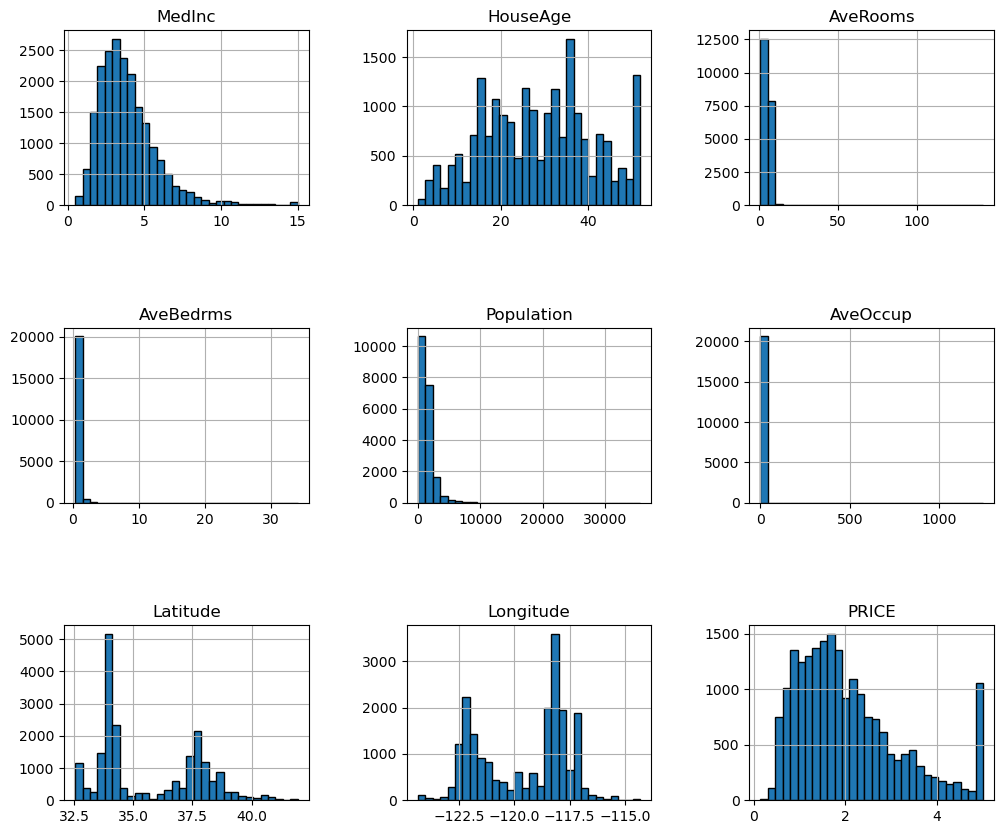

In [11]:
import matplotlib.pyplot as plt

housing_df.hist(figsize=(12,10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

* Feature 표준화 진행

In [12]:

from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()

# StandardScaler 로 데이터 셋 변환 .fit( ) 과 .transform( ) 호출
# fit()은 데이터를 학습시키는 메서드이고 transform()은 실제로 학습시킨 것을 적용하는 메서드
scaler.fit(housing_df)
housing_scaled = scaler.transform(housing_df)

# transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
housing_scaled_df = pd.DataFrame(data=housing_scaled, columns = housing_df.columns)


In [13]:
housing_scaled_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,6.609700e-17,5.508083e-18,6.609700e-17,-1.060306e-16,-1.101617e-17,3.442552e-18,-1.079584e-15,-8.526513e-15,2.037991e-16
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.774299e+00,-2.196180e+00,-1.852319e+00,-1.610768e+00,-1.256123e+00,-2.290000e-01,-1.447568e+00,-2.385992e+00,-1.662641e+00
25%,-6.881186e-01,-8.453931e-01,-3.994496e-01,-1.911716e-01,-5.638089e-01,-6.171062e-02,-7.967887e-01,-1.113209e+00,-7.561633e-01
50%,-1.767951e-01,2.864572e-02,-8.078489e-02,-1.010650e-01,-2.291318e-01,-2.431585e-02,-6.422871e-01,5.389137e-01,-2.353337e-01
75%,4.593063e-01,6.643103e-01,2.519615e-01,6.015869e-03,2.644949e-01,2.037453e-02,9.729566e-01,7.784964e-01,5.014973e-01
max,5.858286e+00,1.856182e+00,5.516324e+01,6.957171e+01,3.025033e+01,1.194191e+02,2.958068e+00,2.625280e+00,2.540411e+00


In [14]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# 선형회귀를 이용해 분석모델 구축하기 (scikit-learn 이용)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error    # 사이킷런을 사용하여 머신러닝 회귀 분석을 하기 위한 LinearRegression과 데이터셋 분리 작업을 위한
from sklearn.metrics import r2_score               #train_test_split, 성능 측정을 위한 평가 지표인 mean_squared_ error, r2_score를 임포트

In [16]:
#X, Y 분할하기
Y = housing_scaled_df['PRICE']
X = housing_scaled_df.drop(['PRICE'], axis = 1, inplace = False) #PRICE 피처를 회귀식의 종속 변수 Y로 설정하고 PRICE를 제외 drop( )한 나머지 피처를 독립 변수 X로 설정

print(Y.shape)
print(X.shape)
#훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 156) # X와 Y 데이터 20640개를 학습 데이터와 평가 데이터로 7:3 비율로 분할test_size=0.3
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(20640,)
(20640, 8)
(14448, 8)
(6192, 8)
(14448,)
(6192,)


* train_test_split https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
  - random_state (int, RandomState instance or None, default=None)

    Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls

    random_state 는 재현가능(for reproducibility)하도록 난수의 초기값을 설정해주는 것, int를 넣으면 됨

In [17]:
#선형 회귀 분석 : 모델 생성
lr = LinearRegression()

#선형 회귀 분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

- LinearRegression() 주요 매개변수 및 속성
  - fit_intercept: 기본값은 True이며, 상수를 모델에 추가할지 여부를 결정합니다.
  - normalize: 기본값은 False이며, 이 매개변수를 True로 설정하면 회귀 전에 입력 데이터를 정규화합니다. (현재는 사용되지 않음)
  - copy_X: 기본값은 True이며, True로 설정하면 입력 데이터를 복사하여 사용합니다.
  - n_jobs: 기본값은 None이며, 병렬 처리 시 사용할 CPU 코어의 수를 설정합니다.
- 주요 메서드
  - fit(X, y): 모델을 데이터 X와 타겟 y에 맞추어 학습시킵니다.
  - predict(X): 학습된 모델을 사용하여 새로운 데이터 X에 대한 예측을 수행합니다.
  - score(X, y): 주어진 테스트 데이터 X와 타겟 y에 대한 모델의 결정계수 (R^2 스코어)를 반환합니다.

- 알고리즘 선택(**기본모델: 정규방정식**)
  - 기본적으로 LinearRegression 모델은 정규 방정식을 사용하여 모델을 피팅. - 데이터 크기와 수치적 안정성을 고려하여 필요할 경우 SVD나 QR 분해를 사용할 수 있음.
  - 대규모 데이터셋에 대해서는 경사 하강법을 사용하는 SGDRegressor 클래스를 고려할 수 있음.

In [18]:
#선형 회귀 분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

Text(0, 0.5, 'Y_predict')

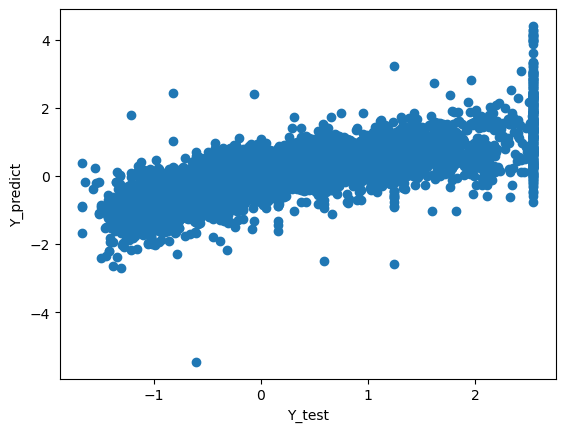

In [20]:
# 예측값과 평가데이터 간 분포도 확인
plt.scatter(Y_test, Y_predict)
plt.xlabel("Y_test")
plt.ylabel("Y_predict")


In [21]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))
print(f'MSE : {mse:.3f}, RMSE : {rmse:.3f}')  # f-string formatting
print(f'R^2(Variance score) : {r2_score(Y_test, Y_predict):.3f}')  # f-string formatting
#회귀 분석은 지도 학습이므로 평가 데이터 X에 대한 결과값 Y (Y_test)를 이미 알고 있는 상태에서 평가 데이터 Y (Y_test)와
#모델에서 구한 예측 결과(Y_predict)의 오차를 계산하여 모델을 평가.
# 평가 지표 MSE를 구하고 구한 값의 제곱근을 계산하여 평가 지표 RMSE를 구함 그리고 평가 지표 R2 을 구함

MSE : 0.408, RMSE : 0.638
R^2(Variance score) : 0.595
MSE : 0.408, RMSE : 0.638
R^2(Variance score) : 0.595


In [22]:
mae = mean_absolute_error(Y_test, Y_predict)
print('MAE : {0:.3f}'.format(mae))

MAE : 0.465


### lr.coef_ 속성은 학습된 선형 회귀 모델의 회귀 계수를 나타냄. 이 속성은 모델이 각 독립 변수(feature)에 대해 학습한 가중치를 포함

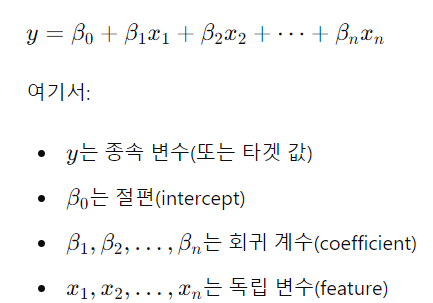

In [23]:
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 2))

Y 절편 값:  -0.003809352453247353
회귀 계수 값:  [ 0.71  0.11 -0.21  0.25 -0.   -0.07 -0.79 -0.76]


In [24]:
coef = pd.Series(data = np.round(lr.coef_, 2), index=X.columns)
coef.sort_values(ascending = False)

MedInc        0.71
AveBedrms     0.25
HouseAge      0.11
Population   -0.00
AveOccup     -0.07
AveRooms     -0.21
Longitude    -0.76
Latitude     -0.79
dtype: float64

* 회귀 모델 결과를 토대로 캘리포니아 주택 가격에 대한 회귀식 구성 가능
  - (예) PRICE = 0.71 x MedInc + 0.25 x AveBedrms + 0.11 x HouseAge - 0.00 x Population - 0.07 x AveOccup - 0.21 * AveRooms - 0.76 * Longitude - 0.79 * Latitude - 0.0038


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

* 독립 변수인 8개 피처와 종속 변수인 주택 가격, PRICE와의 회귀 관계를 보여주는
8개 그래프를 subplots()를 사용하여 3행 3열 구조로 모아서 나타냄
* seaborn의 regplot()은 Seaborn 라이브러리에서 제공하는 함수로, 데이터 포인트와 함께 선형 회귀 모델을 시각화하는 데 사용됨. 이 함수는 주로 두 변수 간의 관계를 시각화할 때 유용. 기본적으로 matplotlib의 Axes 객체를 반환하며, 이를 통해 더욱 세밀한 그래프 커스터마이징이 가능
  - x: x축 데이터. 배열이나 시리즈로 제공될 수 있으며, data가 제공되면 컬럼 이름으로 사용할 수 있습니다.
  - y: y축 데이터. 배열이나 시리즈로 제공될 수 있으며, data가 제공되면 컬럼 이름으로 사용할 수 있습니다.
  - data: 데이터프레임. x와 y에 대한 데이터를 포함합니다.
  - order: 회귀 다항식의 차수. 기본값은 1(선형 회귀).
  - ci: 신뢰 구간의 크기. 기본값은 95.
  - line_kws: 회귀선의 스타일을 지정하는 딕셔너리.
  - scatter_kws: 산점도의 스타일을 지정하는 딕셔너리.

In [26]:
housing_scaled_df.columns[:-1].to_list()

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

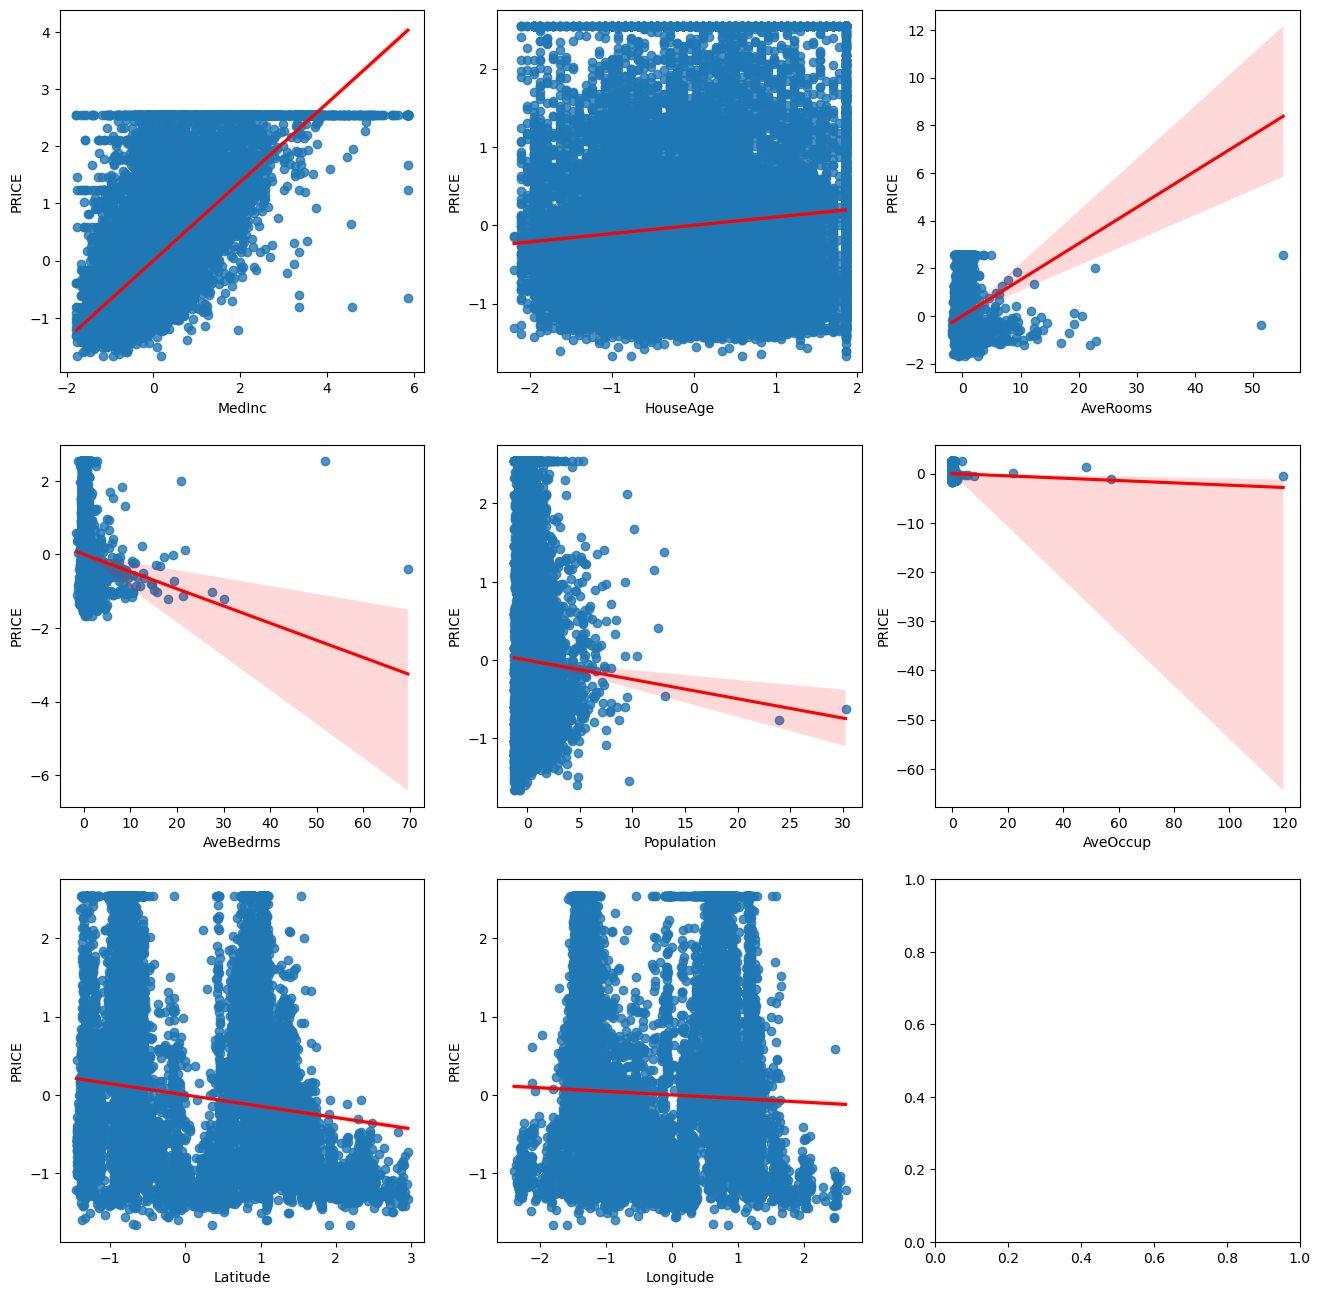

In [27]:
fig, axs = plt.subplots(figsize = (16, 16), ncols = 3, nrows = 3)

#x_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
x_features = housing_scaled_df.columns[:-1].to_list()
for i, feature in enumerate(x_features):
   row = int(i/3)
   col = i % 3
   sns.regplot(x = feature, y = 'PRICE', data = housing_scaled_df, line_kws={"color":"r"}, ax = axs[row][col])